# Домашнее задание по теме «Временные ряды, общая теория» Лебедевой И.С. (DSU-70, TSML-24)

Задание

Скачайте материалы к занятию.
    
Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:

monthly-sales-of-company-x-jan-6.csv
monthly-boston-armed-robberies-j.csv
international-airline-passengers.csv
mean-monthly-air-temperature-deg.csv
weekly-closings-of-the-dowjones-.csv
daily-total-female-births-in-cal.csv

Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
%matplotlib inline

In [419]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

# Отображение графика

In [421]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

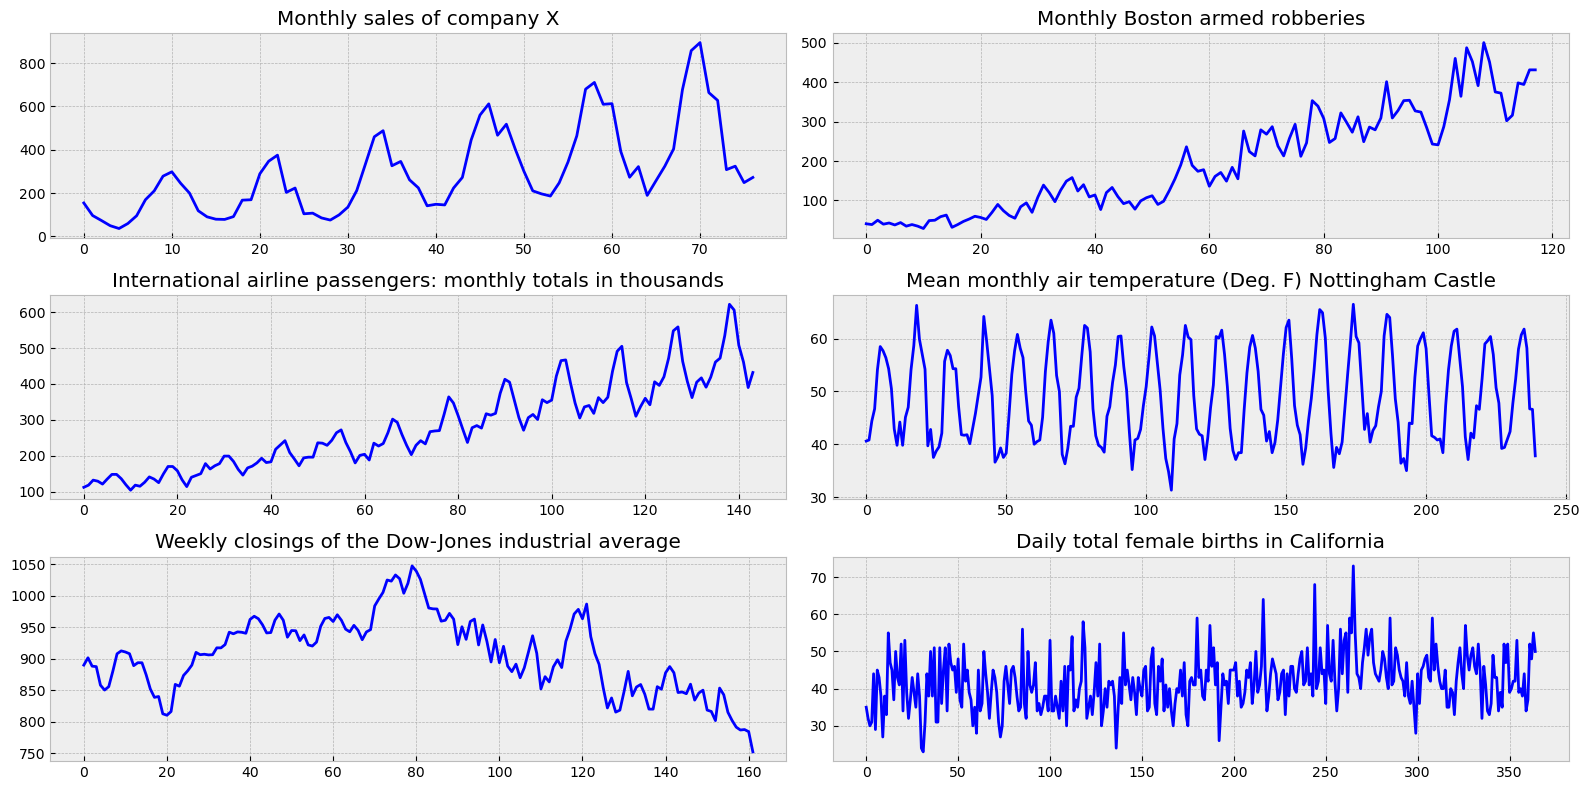

In [423]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# boxcox - избавимся от дисперсии

In [346]:
series = boxcox(all_series["Monthly sales of company X"], 0)
series1 = boxcox(all_series["Monthly Boston armed robberies"], 0)
series2 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
series3 = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)
series4 = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)
series5 = boxcox(all_series["Daily total female births in California"], 0)

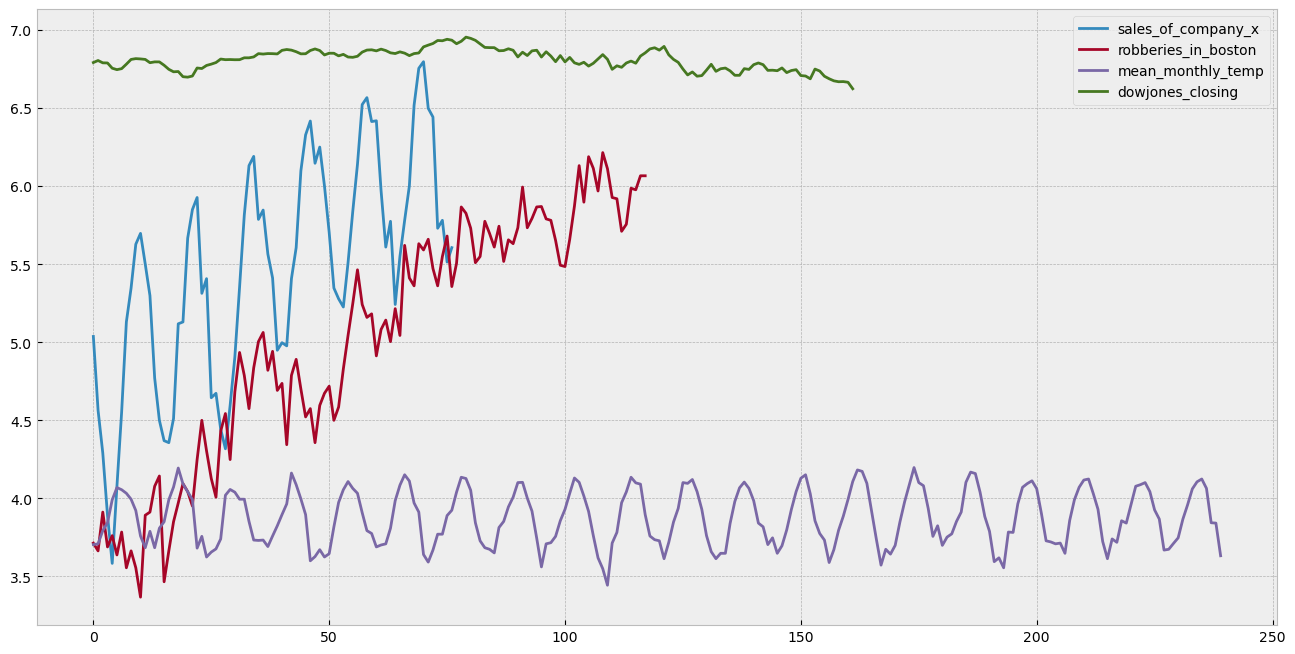

In [348]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, label='sales_of_company_x')
        plt.plot(series1, label='robberies_in_boston')
        plt.plot(series3, label='mean_monthly_temp')
        plt.plot(series4, label='dowjones_closing')
        plt.legend()

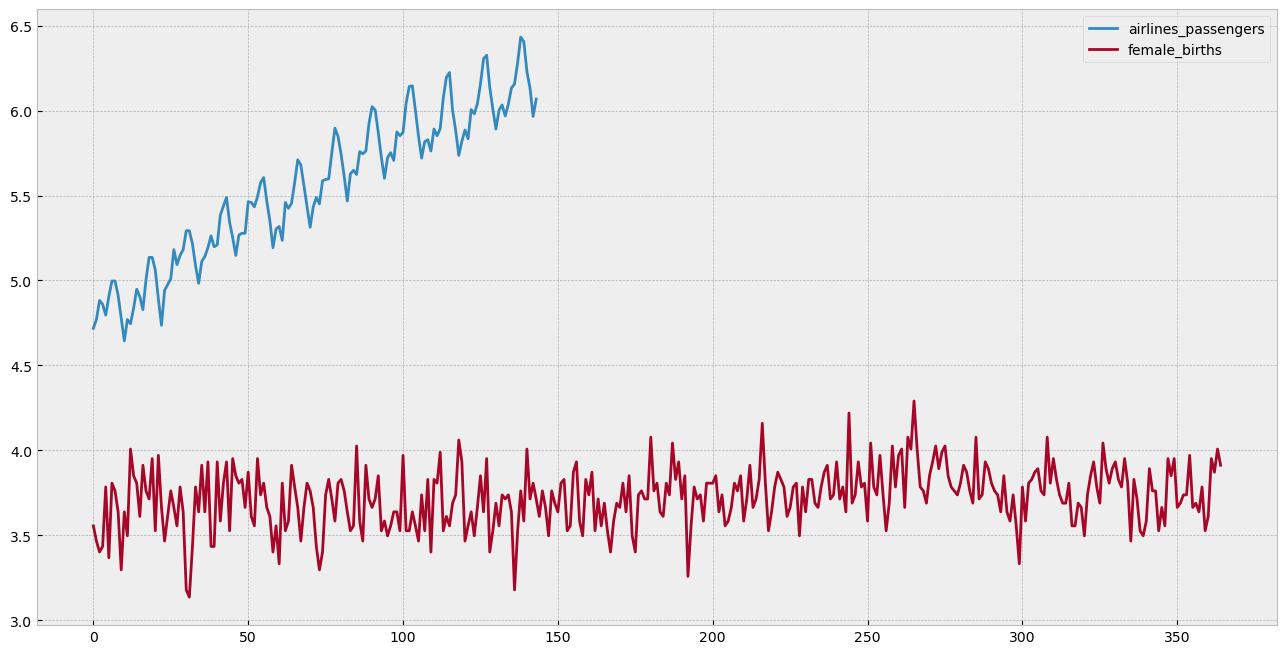

In [349]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, label='airlines_passengers')
        plt.plot(series5, label='female_births')
        plt.legend()

## Посредством дифференцирования избавимся от сезонности

После стабилизации дисперсии стоит устранить сезонность. Это можно сделать посредством дифференцирования. Рассмотрим реализацию дифференцирования в библиотеке pandas на Python, для данных с сезонностью в 12 месяцев:

        Вычитаем из ряда этот же ряд, смещенный на длину периода. Важно: в результате сдвигов в новом ряде появятся пропуски (NaN).

        Если после дифференцирования в данных остается сезонность, можно провести еще одно дифференцирование, но уже с новым рядом:

In [354]:
series = series[:-12] - series[12:]
series1 = series1[:-12] - series1[12:]
series2 = series2[:-12] - series2[12:]
series3 = series3[:-12] - series3[12:]
series4 = series4[:-12] - series4[12:]
series5 = series5[:-12] - series5[12:]

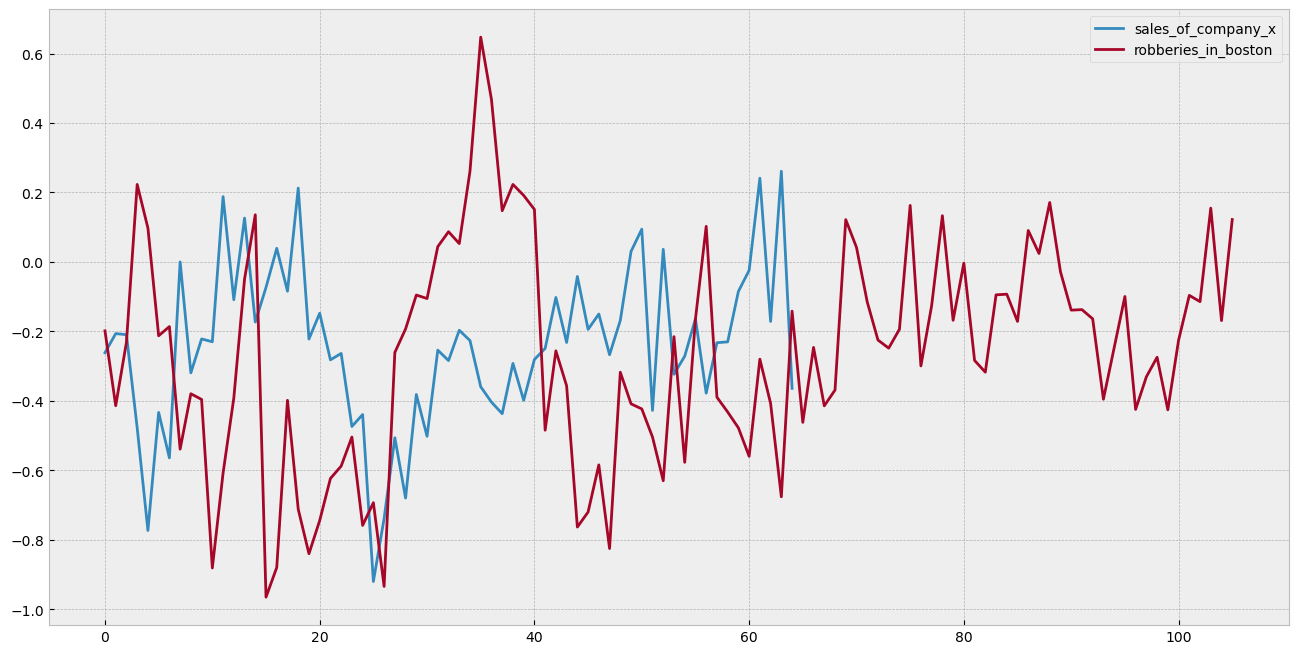

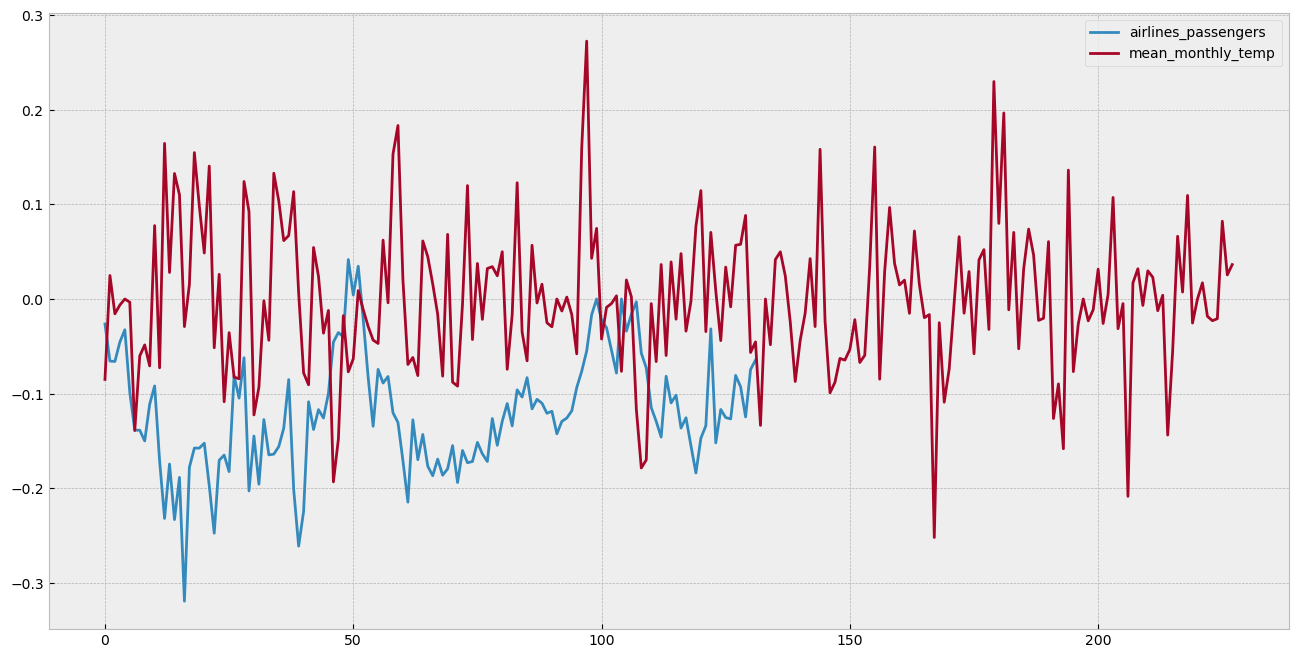

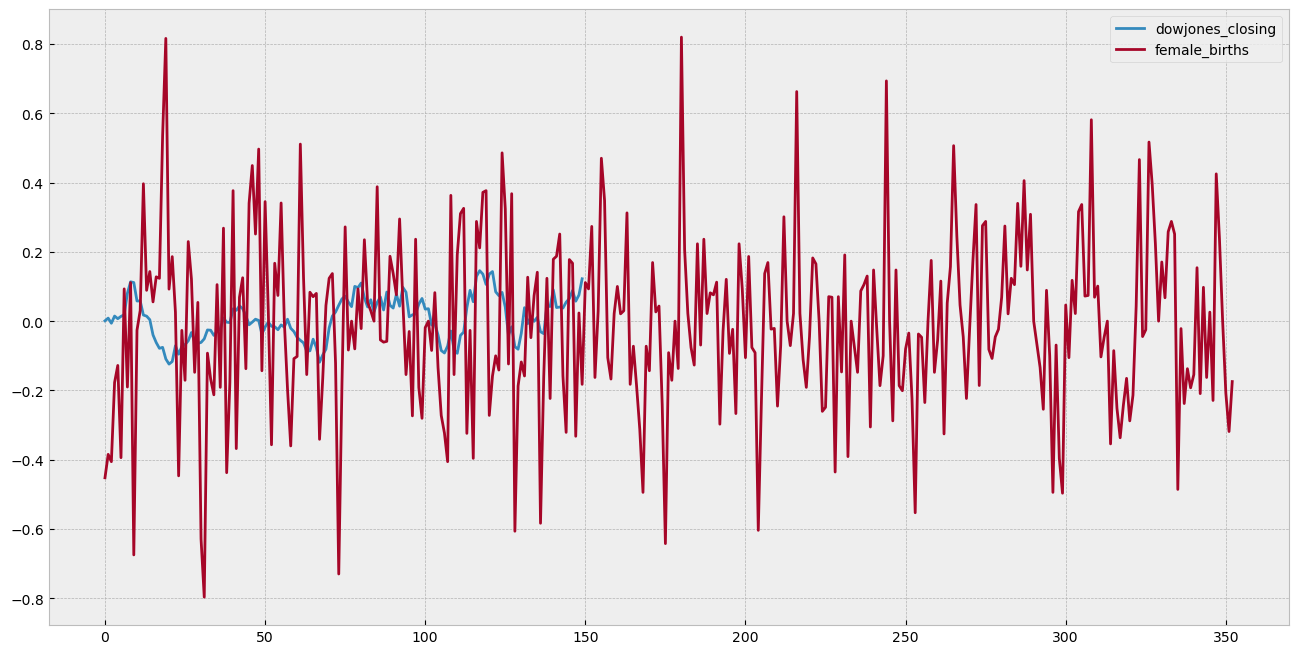

In [356]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, label='sales_of_company_x')
        plt.plot(series1, label='robberies_in_boston')
        plt.legend()

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, label='airlines_passengers')
        plt.plot(series3, label='mean_monthly_temp')
        plt.legend()

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series4, label='dowjones_closing')
        plt.plot(series5, label='female_births')
        plt.legend()

После устранения сезонности из ряда необходимо убрать тренд. Это также делается посредством дифференцирования: из текущего значения ряда вычитается предыдущее значение, смещенное на один

In [359]:
series = np.diff(series, 1)
series1 = np.diff(series1, 1)
series2 = np.diff(series2, 1)
series3 = np.diff(series3, 1)
series4 = np.diff(series4, 1)
series5 = np.diff(series5, 1)

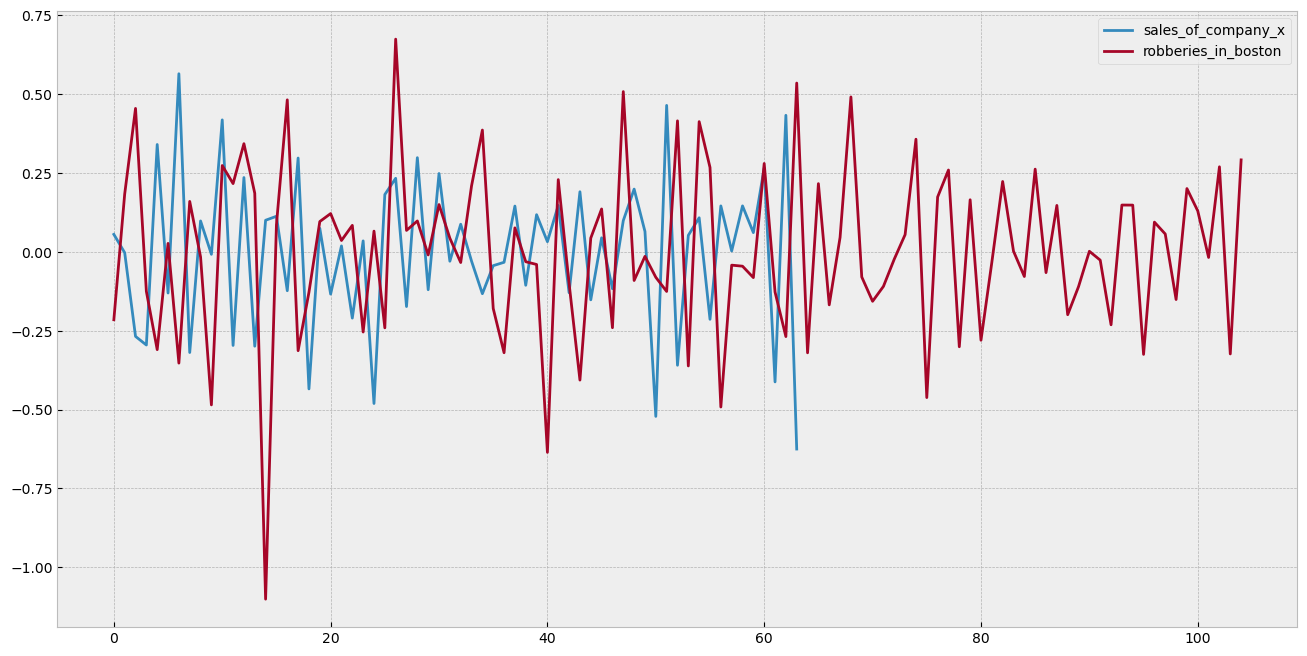

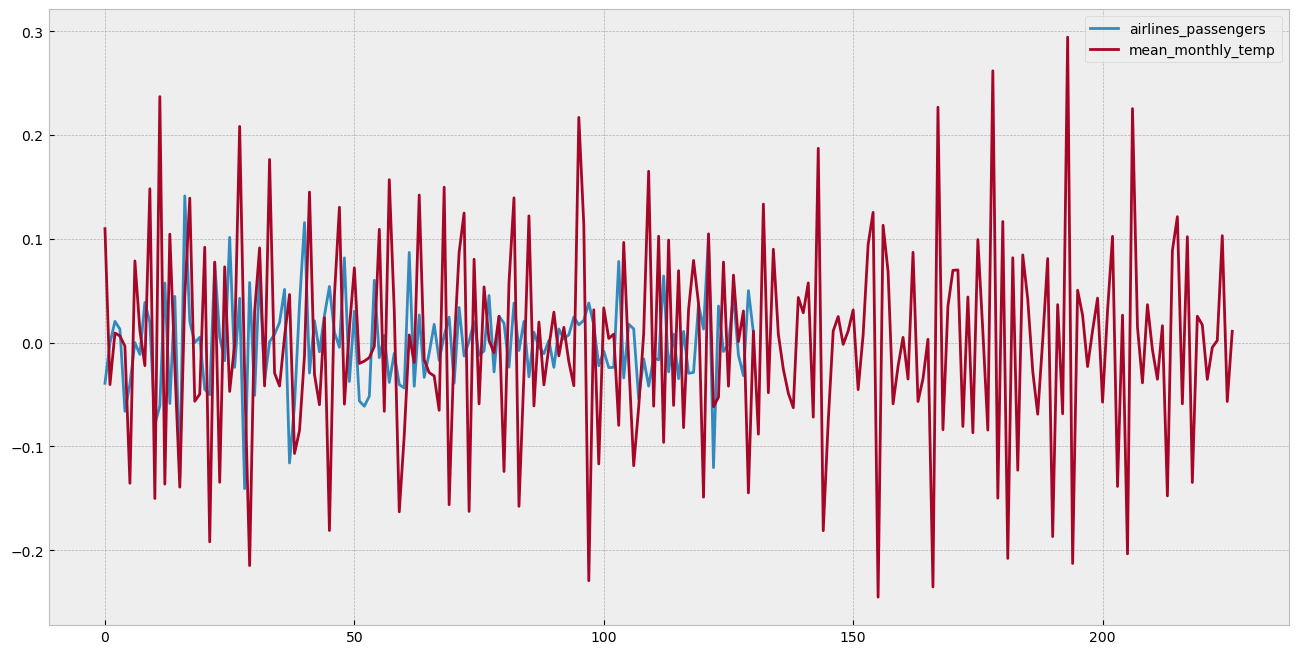

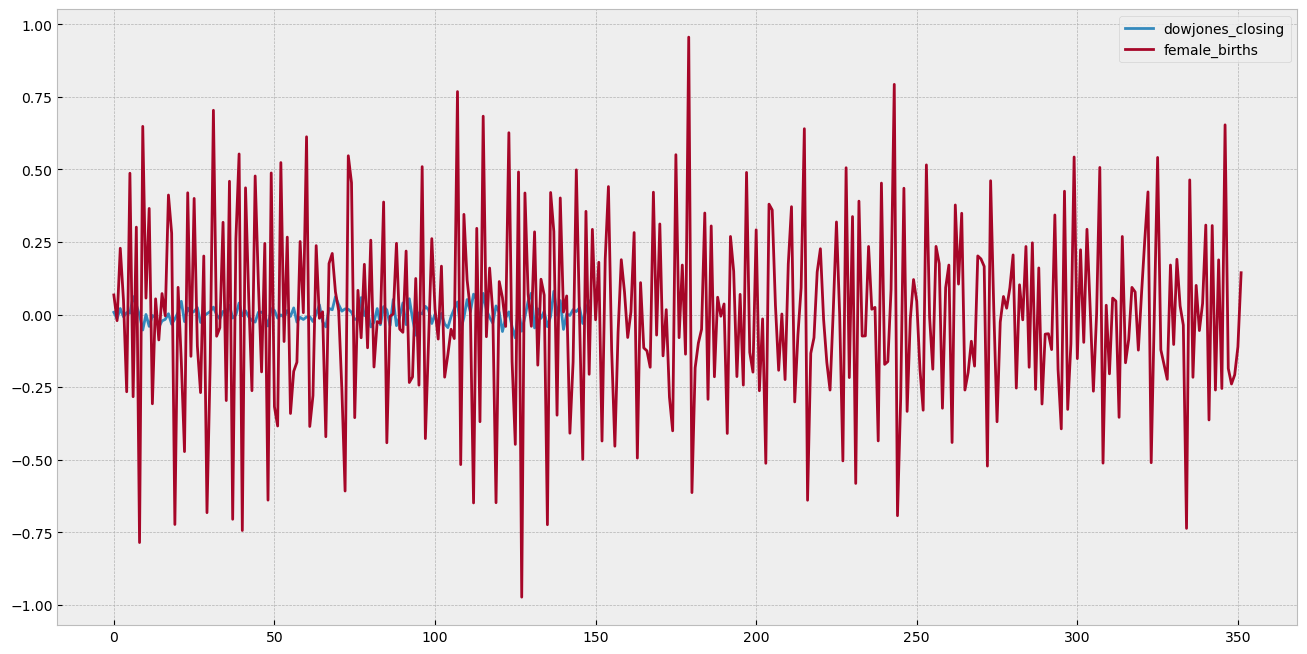

In [361]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, label='sales_of_company_x')
        plt.plot(series1, label='robberies_in_boston')
        plt.legend()

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, label='airlines_passengers')
        plt.plot(series3, label='mean_monthly_temp')
        plt.legend()

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series4, label='dowjones_closing')
        plt.plot(series5, label='female_births')
        plt.legend()

Пример поиска сезонности с периодом 12

In [364]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

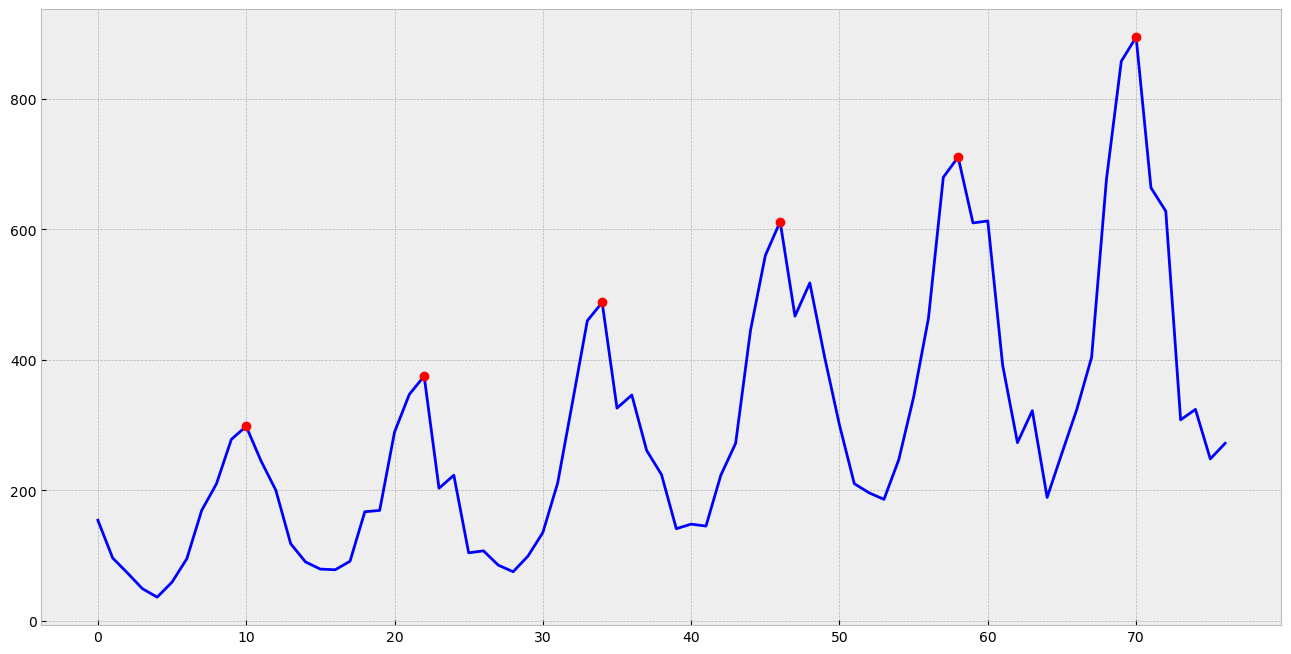

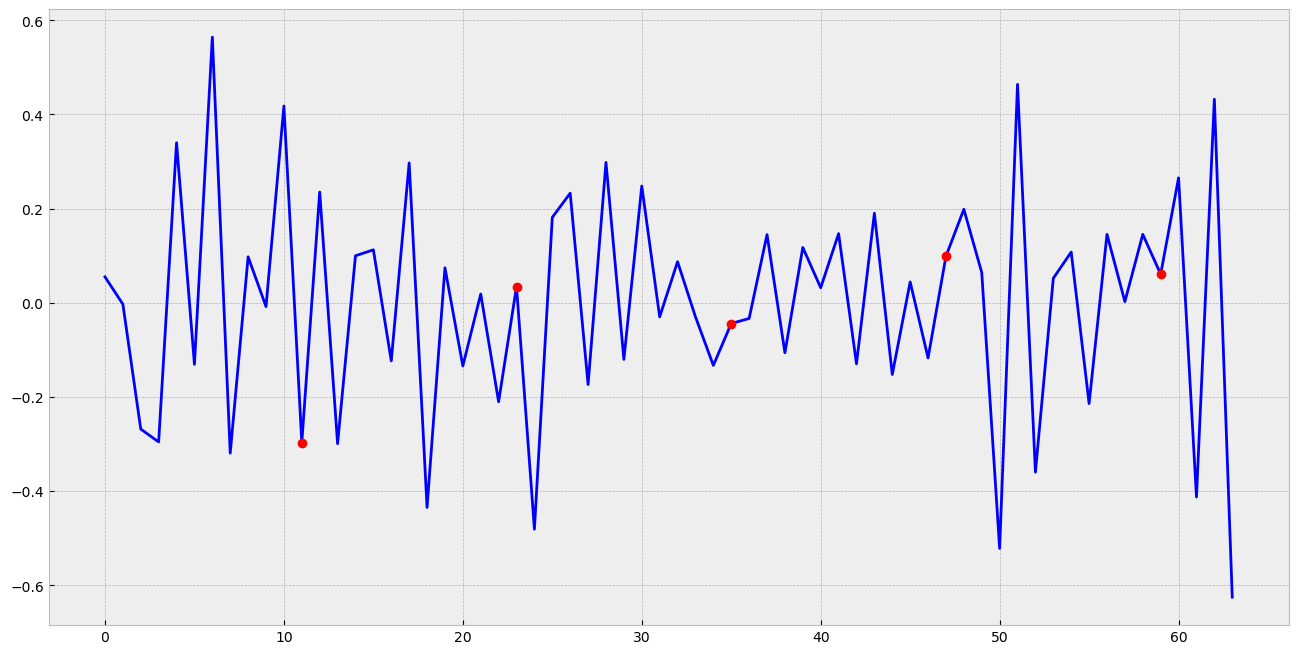

In [366]:
plot_ts_and_points(sales_of_company_x['Count'], 10, 12),
plot_ts_and_points(pd.Series(series), 11, 12)

После устранения сезонности из ряда необходимо убрать тренд. Это также делается посредством дифференцирования: из текущего значения ряда вычитается предыдущее значение, смещенное на один


# Тест Дики-Фуллера 

In [370]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput['p-value'], '- p-value')

In [372]:
test_stationarity(series)
test_stationarity(series1)
test_stationarity(series2)
test_stationarity(series3)
test_stationarity(series4)
test_stationarity(series5)

Results of Dickey-Fuller Test:
0.1668454967417884 - p-value
Results of Dickey-Fuller Test:
0.0005791258821324301 - p-value
Results of Dickey-Fuller Test:
0.00024859123113839645 - p-value
Results of Dickey-Fuller Test:
2.361163522472949e-12 - p-value
Results of Dickey-Fuller Test:
0.009871226530993045 - p-value
Results of Dickey-Fuller Test:
4.892374998453452e-14 - p-value


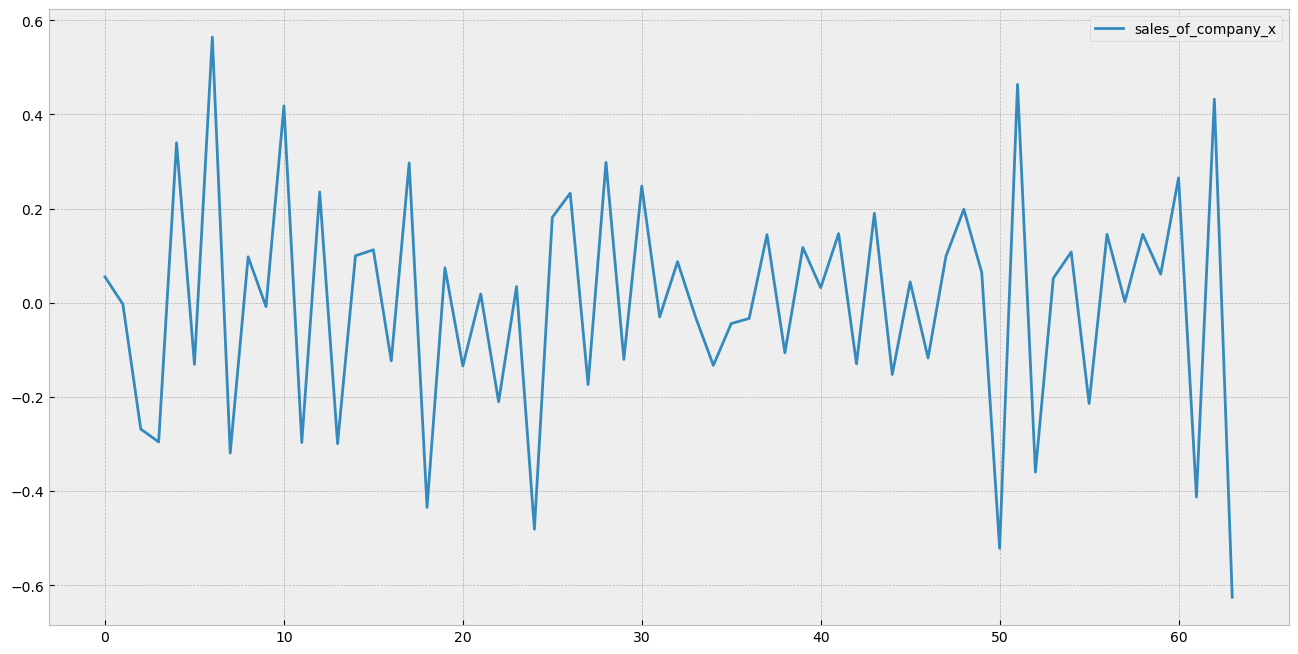

In [374]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, label='sales_of_company_x')
        plt.legend()
    

данные по sales_of_company_x = (series), так и нельзя назвать тационарными. 0.1668454967417884 - p-value, более чем 0,05. Нужны еще преобразования. Сезонность мы уже искали чуть выше, тренда на графике нет. Возможно нужно поменять местами преобразования?


In [442]:
series_1 = boxcox(all_series["Monthly sales of company X"], 0)


In [444]:
series_1 = np.diff(series_1, 1)

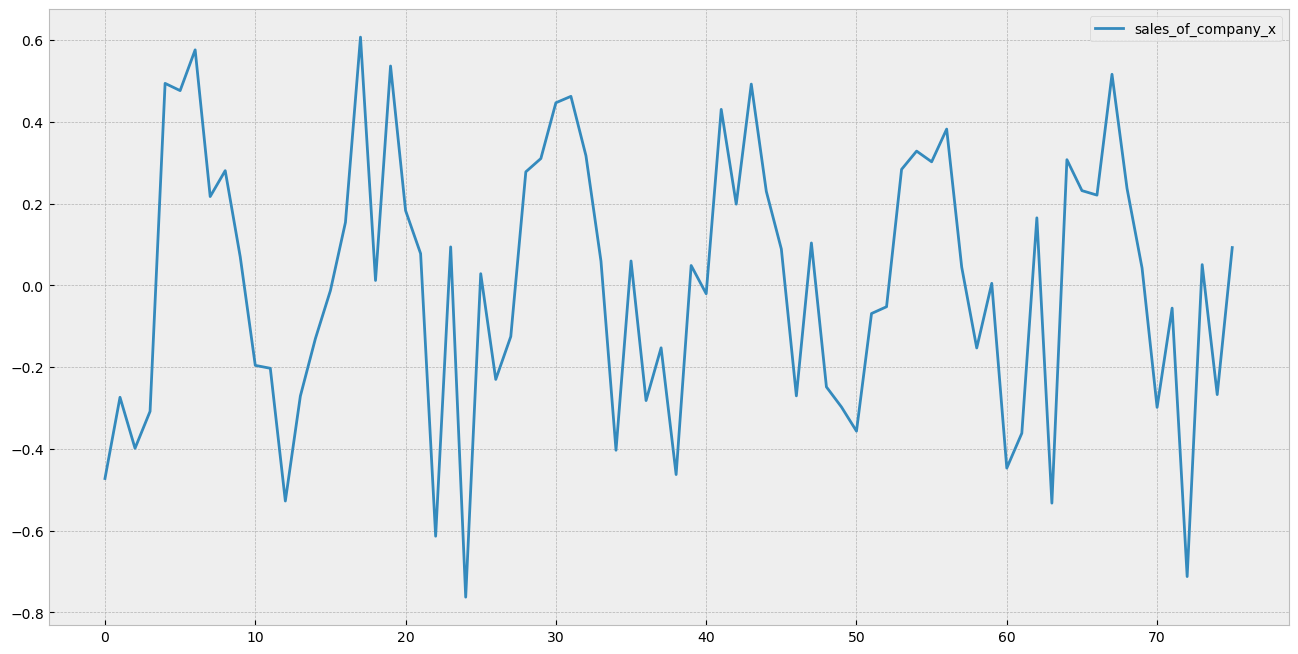

In [446]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_1, label='sales_of_company_x')
        plt.legend()

In [448]:
series_1 = series_1[:-12] - series_1[12:]

In [452]:
series_1 = series_1[:-12] - series_1[12:]

In [456]:
series_1 = series_1[:-12] - series_1[12:]

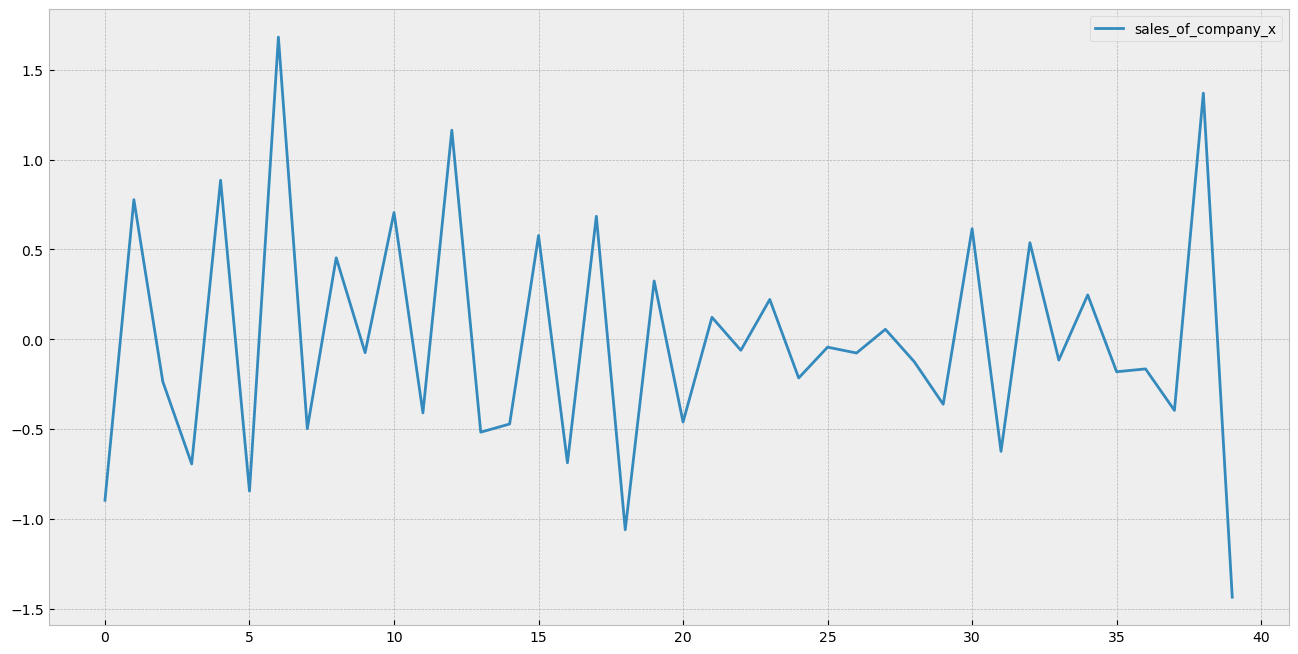

In [458]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_1, label='sales_of_company_x')
        plt.legend()

In [460]:
test_stationarity(series_1)

Results of Dickey-Fuller Test:
8.766532440545064e-28 - p-value


# Коррелограммы

In [381]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [409]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Коррелограммы')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

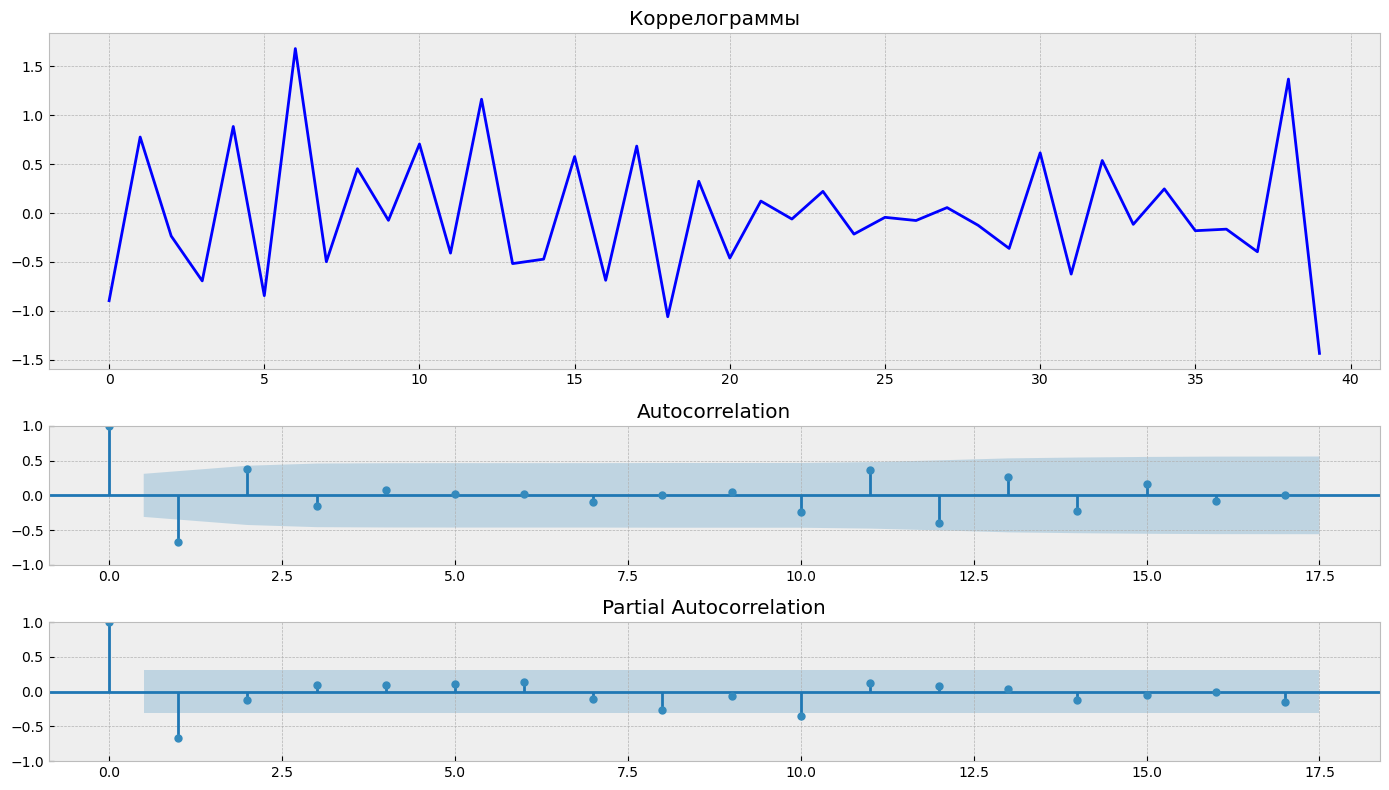

In [462]:
tsplot(series_1)

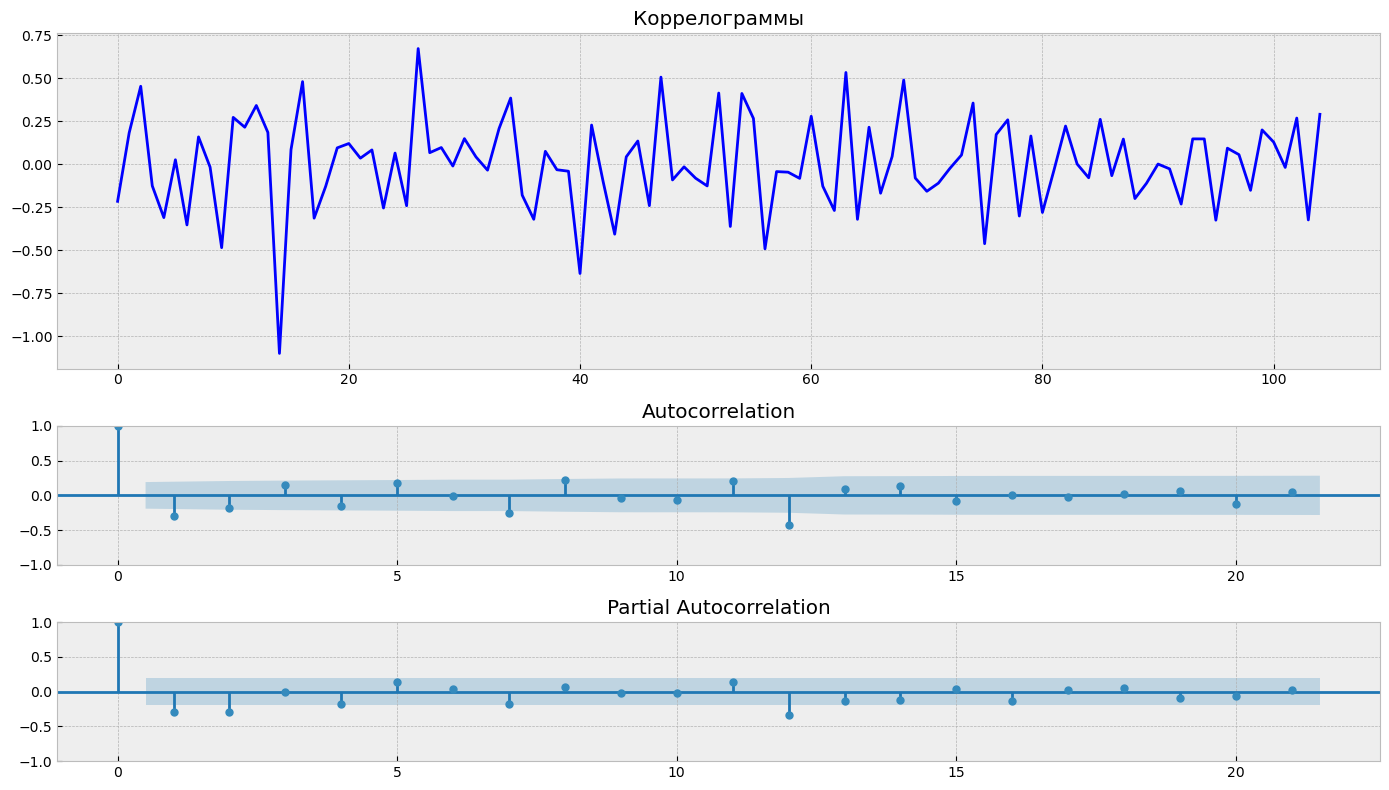

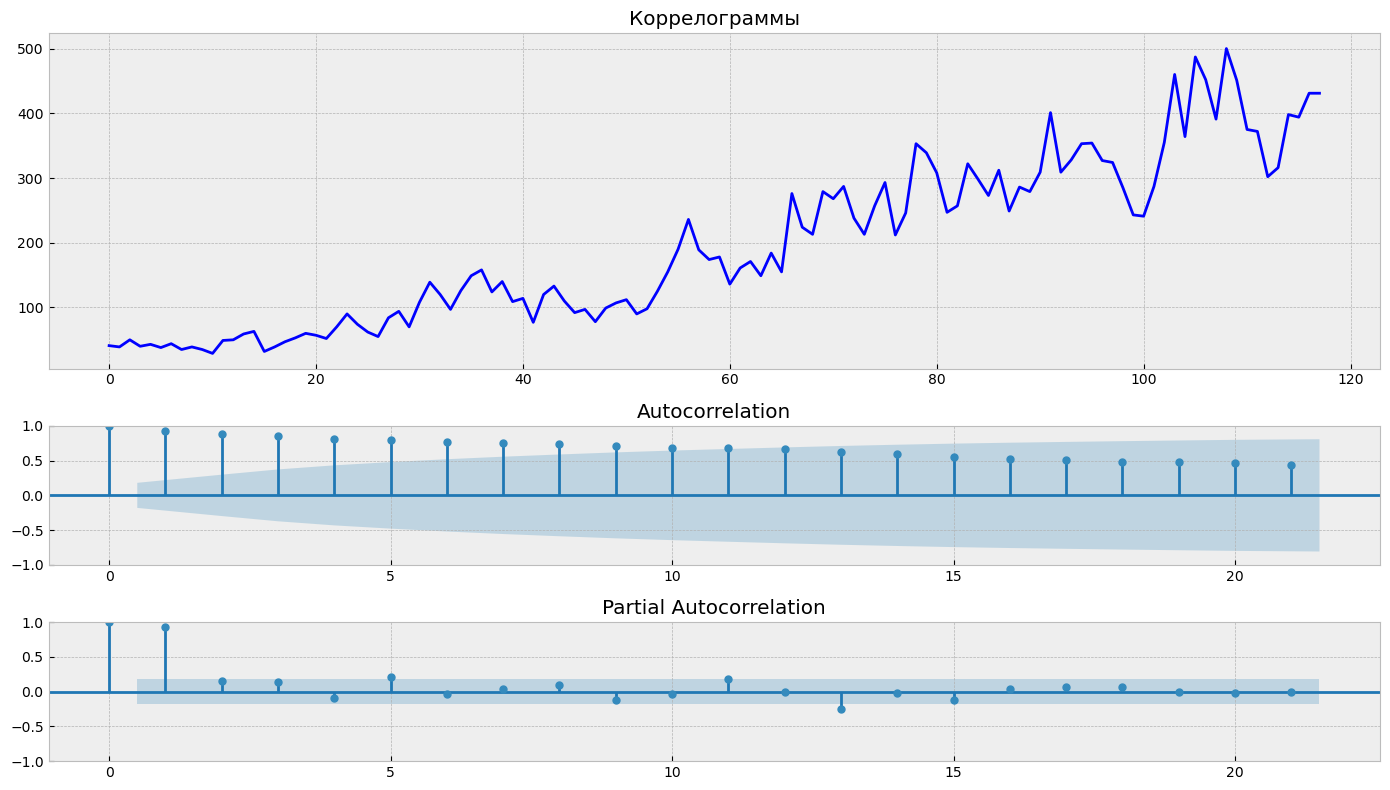

In [413]:
tsplot(series1)
tsplot(all_series["Monthly Boston armed robberies"])
